# Assignment 1

Members:
*  Immanuel Ponminissery - ijp284 - 12PM section
*  Marshall Wurangian - mw38759 - 1:30 PM section 
*  Yuhan Yin - yy8996 - 1:30 PM section
*  Patricia Schutter - pls949 - 1:30 PM section
* Troy Walton - tdw2395 - 12PM section
* Xuxian Chen - xc3984 - 12PM section

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
%pylab inline
import seaborn as sns

import os
from google.colab import drive 
import numpy as np
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/Shared drives/UTMSBA SMA/HW1') #/HW1_trial_2

Populating the interactive namespace from numpy and matplotlib
Mounted at /content/drive


# Part 1

## Inspecting Variables

In [ ]:
# Read the dataset from Kaggle
train_df = pd.read_csv('part 1 data/train.csv')
train_df[:10]

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,4144.258065,11147,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,4144.258065,185616,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,11.678571,564.040816,8120,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333,4302.466667
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,6.859364,1113.202016,298668,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098,3865.446569
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,276.496516,8038.066202,117913,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033,5535.939774


In [ ]:
train_df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [ ]:
# Dataframe Dimensions
train_df.shape

(5500, 23)

Finding correlation coefficients between variables

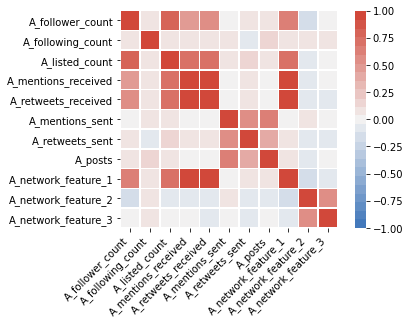

In [ ]:
# Finding correlation coefficients between variables for person A
a = train_df.iloc[:,1:12]
a_corr = a.corr()
a_heatmap = sns.heatmap(
    a_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 15, n=25),
    square=True,
    linewidths=.5
)
a_heatmap.set_xticklabels(
    a_heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Test if correlation coefficients of corresponding columns in B are the same with A

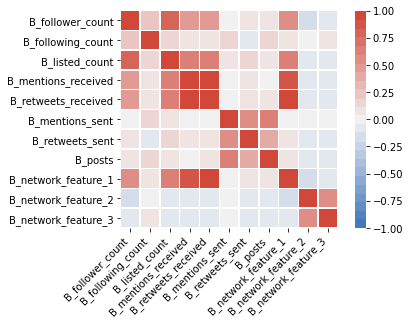

In [ ]:
b = train_df.iloc[:,12:23]

b_corr = b.corr()
b_heatmap = sns.heatmap(
    b_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 15, n=25),
    square=True,
    linewidths=.5
)
b_heatmap.set_xticklabels(
    b_heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# Correlation coefficient values between variables for person A
a_corr

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
A_follower_count,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082
A_following_count,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762
A_listed_count,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574
A_mentions_received,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079
A_retweets_received,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301
A_mentions_sent,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437
A_retweets_sent,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127
A_posts,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347
A_network_feature_1,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711
A_network_feature_2,-0.153272,0.043642,-0.080056,-0.062407,-0.065266,0.064242,-0.048761,-0.066125,-0.118138,1.000000,0.520617


In [ ]:
# Correlation coefficient values between variables for person B
b_corr

,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
B_follower_count,1.000000,0.206914,0.825349,0.442939,0.452106,0.016834,0.097666,0.041268,0.577502,-0.153253,-0.040810
B_following_count,0.206914,1.000000,0.185602,0.059341,0.051346,0.133472,-0.079185,0.156651,0.068276,0.037912,0.098967
B_listed_count,0.825349,0.185602,1.000000,0.646975,0.663580,0.061640,0.163548,0.062193,0.638013,-0.087283,-0.045283
B_mentions_received,0.442939,0.059341,0.646975,1.000000,0.986410,0.024797,0.048683,0.031186,0.907967,-0.067818,-0.043421
B_retweets_received,0.452106,0.051346,0.663580,0.986410,1.000000,0.021169,0.046010,0.040825,0.915914,-0.072015,-0.046866
B_mentions_sent,0.016834,0.133472,0.061640,0.024797,0.021169,1.000000,0.573365,0.595929,0.033309,0.034726,0.017665
B_retweets_sent,0.097666,-0.079185,0.163548,0.048683,0.046010,0.573365,1.000000,0.405168,0.085330,-0.062874,-0.048987
B_posts,0.041268,0.156651,0.062193,0.031186,0.040825,0.595929,0.405168,1.000000,0.082300,-0.084289,-0.041653
B_network_feature_1,0.577502,0.068276,0.638013,0.907967,0.915914,0.033309,0.085330,0.082300,1.000000,-0.124884,-0.079573
B_network_feature_2,-0.153253,0.037912,-0.087283,-0.067818,-0.072015,0.034726,-0.062874,-0.084289,-0.124884,1.000000,0.572694


In [ ]:
# Find correlation between variables in A where coefficients are between 0.6 and 0.999
a_corr.where(np.triu((a_corr.values <= 0.9999) & (a_corr.values >= 0.6))).stack()

A_follower_count     A_listed_count         0.815952
                     A_network_feature_1    0.622146
A_listed_count       A_mentions_received    0.734589
                     A_retweets_received    0.747752
                     A_network_feature_1    0.705268
A_mentions_received  A_retweets_received    0.990021
                     A_network_feature_1    0.922340
A_retweets_received  A_network_feature_1    0.928273
A_mentions_sent      A_posts                0.607040
dtype: float64

In [ ]:
# Find correlation between variables in B where coefficients are between 0.6 and 0.999
b_corr.where(np.triu((b_corr.values <= 0.9999) & (b_corr.values >= 0.6))).stack()

B_follower_count     B_listed_count         0.825349
B_listed_count       B_mentions_received    0.646975
                     B_retweets_received    0.663580
                     B_network_feature_1    0.638013
B_mentions_received  B_retweets_received    0.986410
                     B_network_feature_1    0.907967
B_retweets_received  B_network_feature_1    0.915914
dtype: float64

**Should all variables be used?**
Based on the correlation coefficients between variables, we decided to drop  X_mentions_received and X_network_feature_1 because both had high correlation with X_retweets_recieved, which we decided to keep. X_network_feature_1 also had high correlations with other variables. Dropping variables with high correlations with one another was done to prevent redundancy.

## Transformation of variables and trying different models

In [ ]:
# Drop mentions_received and network_feature_1 for both A and B
new_train_df = train_df.drop(['A_mentions_received','A_network_feature_1','B_mentions_received','B_network_feature_1'],axis = 1)
new_train_df

,Choice,A_follower_count,A_following_count,A_listed_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000,34463,29808,1689,3.984029,8.204331,0.332423,6.988815,75.530303,1916.893939
1,0,21591,1179,228,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048,39262,848,1610,8.943607,3.227677,0.564343,1.070321,132.030675,2931.515337
2,0,7310,1215,101,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907,3622,482,206,0.354379,0.603202,0.100503,0.603202,10.333333,277.333333
3,0,20,7,2,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667,19562,17637,278,390.293681,27.552040,7.167557,32.101906,23.469296,1395.845634
4,1,45589,862,2641,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943,7554,1711,181,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,41765,185,1356,282.858500,76.809514,5.392171,104.438625,50.132042,3585.789866,804394,1370,15143,5013.642295,22.683131,2.385538,18.420981,21.324988,1413.825398
5496,1,112,243,5,0.100503,0.100503,0.100503,0.603177,96.600000,1414.200000,794,479,8,0.306073,0.100503,0.100503,1.621981,49.000000,4969.000000
5497,0,15385,673,747,22.321945,6.946233,0.341936,6.503977,152.495098,3286.617647,7554,1711,181,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
5498,0,265258,209,551,457.648550,5.460985,0.100503,7.498126,3.826314,506.692136,322682,37601,22232,42.330221,6.849227,1.345073,4.359865,234.338068,7168.464489


In [ ]:
# Transform dataframe to A/B
train_ratio = pd.DataFrame(new_train_df['Choice'])
for i in range(1,10):
    train_ratio[new_train_df.columns[i][2:]+'_ratio'] = new_train_df[new_train_df.columns[i]]/new_train_df[new_train_df.columns[i+9]].replace(to_replace=0,value=.01)
    
train_ratio.head()

,Choice,follower_count_ratio,following_count_ratio,listed_count_ratio,retweets_received_ratio,mentions_sent_ratio,retweets_sent_ratio,posts_ratio,network_feature_2_ratio,network_feature_3_ratio
0,0,0.006616,0.010132,0.001776,0.025227,0.012250,0.302336,0.051819,2.204413,5.923645
1,0,0.549921,1.390330,0.141615,2.884551,1.768866,1.968943,4.836513,0.139687,0.453815
2,0,2.018222,2.520747,0.490291,26.966469,8.888426,5.882446,5.951102,6.670436,21.634244
3,0,0.001022,0.000397,0.007194,0.000711,0.048327,0.014022,0.088176,0.085218,0.068895
4,1,6.035081,0.503799,14.591160,10.330091,4.121682,2.977058,5.229015,2.626893,1.421453


In [ ]:
# Test accuracy for train_ratio 
y = train_ratio['Choice'].values
X = train_ratio[train_ratio.columns[1:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Logistic Regression for train_ratio
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_confusion_matrix

model1 = LR()
model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
print(confusion_matrix(y_test, prediction1))
accuracy_score(y_test, prediction1)

[[  2 517]
 [  1 580]]


0.5290909090909091

In [ ]:
# Transform dataframe to A-B
train_diff = pd.DataFrame(new_train_df['Choice'])
for i in range(1,10):
    train_diff[new_train_df.columns[i][2:]+'_diff'] = new_train_df[new_train_df.columns[i]] - new_train_df[new_train_df.columns[i+9]]
train_diff.head()

,Choice,follower_count_diff,following_count_diff,listed_count_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_2_diff,network_feature_3_diff
0,0,-34235,-29506,-1686,-3.883525,-8.103828,-0.231920,-6.626665,90.969697,9438.106061
1,0,-17671,331,-1382,16.854685,2.481652,0.546816,4.106299,-113.587704,-1601.149290
2,0,3688,733,-105,9.201969,4.758317,0.490702,2.986516,58.594502,5722.563574
3,0,-19542,-17630,-276,-390.016375,-26.220532,-7.067053,-29.271279,-21.469296,-1299.678967
4,1,38035,-849,2460,33.417223,21.117111,2.213765,19.298035,78.904293,840.220036


In [ ]:
# Test accuracy for train_diff -> this will be used as it has a higher accuracy than train_diff
y = train_diff['Choice'].values
X = train_diff[train_diff.columns[1:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Confusion Matrix for train_diff
model2 = LR()
model2.fit(X_train, y_train)

prediction2 = model2.predict(X_test)
print(confusion_matrix(y_test, prediction2))
accuracy_score(y_test, prediction2)

[[386 133]
 [142 439]]


0.75

**Which transformation has been selected?**

We decided to use A-B transformation as it has a higher accuracy (75%) compared to A/B which has a lower accuracy (52.9%). This was done to make the results easier to interpret.

In [ ]:
# Logistic Regression Results
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.581449
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4400
Model:                          Logit   Df Residuals:                     4391
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.1611
Time:                        05:15:03   Log-Likelihood:                -2558.4
converged:                       True   LL-Null:                       -3049.6
Covariance Type:            nonrobust   LLR p-value:                8.762e-207
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -3.28e-08    3.1e-08     -1.058      0.290   -9.36e-08     2.8e-08
x2          8.994e-07   5.88e

In [ ]:
train_diff.columns

Index(['Choice', 'follower_count_diff', 'following_count_diff',
       'listed_count_diff', 'retweets_received_diff', 'mentions_sent_diff',
       'retweets_sent_diff', 'posts_diff', 'network_feature_2_diff',
       'network_feature_3_diff'],
      dtype='object')

In [ ]:
# Drop columns follower_count_diff, following_count_diff, retweets_received_diff, posts_diff as p-values are > 0.05 thus proving insignificant
final_df = train_diff.drop(['follower_count_diff', 'following_count_diff', 'retweets_received_diff','posts_diff'],axis = 1)

In [ ]:
# Test accuracy for final_df and final confusion matrix (Best Model)
y = final_df['Choice'].values
X = final_df[final_df.columns[1:]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Logistic Regression
model3 = LR()
model3.fit(X_train, y_train)

prediction3 = model3.predict(X_test)
print(confusion_matrix(y_test, prediction3))
accuracy_score(y_test, prediction3)

[[375 144]
 [135 446]]


0.7463636363636363

In [ ]:
# Logistic Regression Results for final model
logit_model2=sm.Logit(y_train,X_train)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.582521
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4400
Model:                          Logit   Df Residuals:                     4395
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.1595
Time:                        05:15:20   Log-Likelihood:                -2563.1
converged:                       True   LL-Null:                       -3049.6
Covariance Type:            nonrobust   LLR p-value:                2.397e-209
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.813e-05   4.35e-06     20.255      0.000    7.96e-05    9.67e-05
x2             0.0123      0.

In [ ]:
final_df.columns

Index(['Choice', 'listed_count_diff', 'mentions_sent_diff',
       'retweets_sent_diff', 'network_feature_2_diff',
       'network_feature_3_diff'],
      dtype='object')

## Best Model
Our best model with significant variables (p-value <0.05) were of variables 'listed_count_diff', 'mentions_sent_diff', 'retweets_sent_diff', 'network_feature_2_diff', and 'network_feature_3_diff'.

The **confusion matrix** of the best model is as follows:
 $$\begin{bmatrix} 375 & 144 \\ 135 & 446 \end{bmatrix}$$

The accuracy rate obtained from the model:
74.64%

The best predictors of influence are shown below:

In [ ]:
# Important features based on coefficients
important_features = pd.DataFrame(model3.coef_[0].transpose(), index = final_df.columns[1:], columns = ["Coefficient"]).sort_values(by = "Coefficient", ascending = False)
important_features

,Coefficient
retweets_sent_diff,0.104457
mentions_sent_diff,0.012275
network_feature_2_diff,0.001103
listed_count_diff,0.000088
network_feature_3_diff,0.000026


In [ ]:
# Important features based on Recursive Feature Elimination
# RFE method verifies/confirms the ranking above in order

from sklearn.feature_selection import RFE
selector = RFE(model3, n_features_to_select=1, step=1)
selector = selector.fit(X, y)
print(list(final_df.columns)[1:])
selector.ranking_

['listed_count_diff', 'mentions_sent_diff', 'retweets_sent_diff', 'network_feature_2_diff', 'network_feature_3_diff']


array([4, 2, 1, 3, 5])

**The top predictors are as follows:**



*   retweets_sent_diff	
*   mentions_sent_diff
*   network_feature_2_diff
*   listed_count_diff
*   network_feature_3_diff



**How can a business use the model/results?**

A business could use this model to find influencers on Twitter based on these predictors for marketing opportunities. Businesses may also utilize this model to get a better understanding on which Twitter attributes possibly leads to greater influence in the social media platform to increase visibility and advertising. 

## Financial value of model

In [ ]:
# Creating the dataframe for the financial model
finvalue_df = train_df[['Choice','A_follower_count','B_follower_count']]

In [ ]:
# Calculate the financial value of the model without analytics
finvalue_df["Cost"] = 10
finvalue_df["Revenue"] = 0.0001*10*finvalue_df["A_follower_count"]
finvalue_df.loc[(finvalue_df["Choice"] == 0),"Revenue"] = 0.0001*10*finvalue_df["B_follower_count"]
finvalue_df["Profit"] = finvalue_df["Revenue"] - finvalue_df["Cost"]
finvalue_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Choice,A_follower_count,B_follower_count,Cost,Revenue,Profit
0,0,228,34463,10,34.463,24.463
1,0,21591,39262,10,39.262,29.262
2,0,7310,3622,10,3.622,-6.378
3,0,20,19562,10,19.562,9.562
4,1,45589,7554,10,45.589,35.589
...,...,...,...,...,...,...
5495,0,41765,804394,10,804.394,794.394
5496,1,112,794,10,0.112,-9.888
5497,0,15385,7554,10,7.554,-2.446
5498,0,265258,322682,10,322.682,312.682


In [ ]:
# Without analytics profit sum
finvalue_df["Profit"].sum()

5321568.593

In [ ]:
# Without analytics profict average
finvalue_df["Profit"].mean()

967.557925999997

In [ ]:
# Calculate the financial value of the model with analytics
finvalue_analytics = train_df[['Choice','A_follower_count','B_follower_count']]
finvalue_analytics["Prediction"] = model3.predict(X)
finvalue_analytics["Cost"] = 10
finvalue_analytics["Revenue"] = 0

finvalue_analytics.loc[(finvalue_analytics["Choice"] == 0) & (finvalue_analytics["Prediction"] == 0),"Revenue"] = 0.00015*10*finvalue_analytics["B_follower_count"]
finvalue_analytics.loc[(finvalue_analytics["Choice"] == 1) & (finvalue_analytics["Prediction"] == 1),"Revenue"] = 0.00015*10*finvalue_analytics["A_follower_count"]

finvalue_analytics["Profit"] = finvalue_analytics["Revenue"] - finvalue_analytics["Cost"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
finvalue_analytics

,Choice,A_follower_count,B_follower_count,Prediction,Cost,Revenue,Profit
0,0,228,34463,1,10,0.0000,-10.0000
1,0,21591,39262,0,10,58.8930,48.8930
2,0,7310,3622,1,10,0.0000,-10.0000
3,0,20,19562,0,10,29.3430,19.3430
4,1,45589,7554,1,10,68.3835,58.3835
...,...,...,...,...,...,...,...
5495,0,41765,804394,0,10,1206.5910,1196.5910
5496,1,112,794,0,10,0.0000,-10.0000
5497,0,15385,7554,1,10,0.0000,-10.0000
5498,0,265258,322682,0,10,484.0230,474.0230


In [ ]:
# With analytics profit sum
finvalue_analytics["Profit"].sum()

7320068.93

In [ ]:
# With anaytics profit average
finvalue_analytics["Profit"].mean()

1330.9216236363634

In [ ]:
# Calculate the financial value of the perfect model analytics

finvalue_perfect = train_df[['Choice','A_follower_count','B_follower_count']]
finvalue_perfect["Cost"] = 10
finvalue_perfect["Revenue"] = 0

finvalue_perfect.loc[(finvalue_perfect["Choice"] == 0),"Revenue"] = 0.00015*10*finvalue_perfect["B_follower_count"]
finvalue_perfect.loc[(finvalue_perfect["Choice"] == 1),"Revenue"] = 0.00015*10*finvalue_perfect["A_follower_count"]

finvalue_perfect["Profit"] = finvalue_perfect["Revenue"] - finvalue_perfect["Cost"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
finvalue_perfect

,Choice,A_follower_count,B_follower_count,Cost,Revenue,Profit
0,0,228,34463,10,51.6945,41.6945
1,0,21591,39262,10,58.8930,48.8930
2,0,7310,3622,10,5.4330,-4.5670
3,0,20,19562,10,29.3430,19.3430
4,1,45589,7554,10,68.3835,58.3835
...,...,...,...,...,...,...
5495,0,41765,804394,10,1206.5910,1196.5910
5496,1,112,794,10,0.1680,-9.8320
5497,0,15385,7554,10,11.3310,1.3310
5498,0,265258,322682,10,484.0230,474.0230


In [ ]:
# Perfect model profit sum
finvalue_perfect["Profit"].sum()

8009852.8895

In [ ]:
# Perfect model profit average
finvalue_perfect["Profit"].mean()

1456.3368889999986

**What is the lift in expected net profit from using analytic model?**



Lift in expected net profit from using Analytic Model: (Mean Profit with analytics - Mean Profit without analytics)/Mean Profit without analytics: (1330.9216236363634 - 967.557925999997)/967.557925999997 = 0.376

*Using analytics increased the average profit per person by 37.6%*

**What is the lift in net profit from using a perfect analytic model?**

Lift in expected net profit from using Perfect model:
(Mean Profit of perfect model with analytics - Mean Profit without analytics)/Mean Profit without analytics: (1456.3368889999986 - 967.557925999997)/967.557925999997 = 0.505

*Using the perfect model with analytics increased the average profit per person by 50.5%*




# Part 2.1 Twitter Scraping 

The topic chosen for the project is the impeachment of President Trump. The hashtags that were searched are:

1.   #impeachment
2.   #DonaldTrump
3.   #insurrectionists
4.   #UScapitol



In [ ]:
 #!/usr/bin/python2.7
# change keywords in line 82; this script will fecth 3000 tweets
# if you get no module named oauth2, install with pip2.7 install --user oauth2
# the tweets will be written in a file tweets.csv
# make sure you change the outout file name when you run this script multiple timees.
!pip install oauth2
#!pip install urllib2
import oauth2 as oauth
import csv
from csv import writer
import json
import time
#import urllib2 as urllib
import urllib.request as urllib
import pandas as pd

import os

from google.colab import drive 
drive.mount('/content/drive/')

os.chdir('/content/drive/Shared drives/UTMSBA SMA/HW1/twitter data')

Set up the developer keys to scrape Twitter

In [ ]:
'''
api_key = "C5hjotqtklX1lOAm2fbtyjzCZ"
api_secret = "gj4ZwiAHaOlDU24FqboWKmjBcBYVVkngwifoUeN9J67KdMX2R4"
access_token_key = "103593847-0lo2TTtkQG9GlOuPwzyFeRQoCzF9lWwEQO0uw03k"
access_token_secret = "mY2SE7tndPFKiNT82w7DWgPptvl2NyO6J3Khe5D6Rpgp1"
'''
api_key = "8FgvmN0U8guMURWdECfJuenw1"
api_secret = "LiPmqyuxWrfXcWOeFppGbXePjnhmZ5QEzPd8C2uC2C2ymQ3NsP"
access_token_key = "435122233-pKq1sbPM9VfSF0V79DVMh6ye7EE56NqJ7F4MdrLg"
access_token_secret = "BuyCyNN9niLFDAGTs5KBzkk2lTy1UvnnL0CuJ2ePvCzLb"



_debug=0

oauth_token    = oauth.Token(key=access_token_key, secret=access_token_secret)
oauth_consumer = oauth.Consumer(key=api_key, secret=api_secret)

signature_method_hmac_sha1 = oauth.SignatureMethod_HMAC_SHA1()

http_method = "GET"

http_handler  = urllib.HTTPHandler(debuglevel=_debug)
https_handler = urllib.HTTPSHandler(debuglevel=_debug)

Fetch a topic that has plenty of tweets and use its list of "max_id" to scrape for our topic

In [ ]:
'''
Construct, sign, and open a twitter request
using the hard-coded credentials above.
'''
def twitterreq(url, method, parameters):
  req = oauth.Request.from_consumer_and_token(oauth_consumer,
                                             token=oauth_token,
                                             http_method=http_method,
                                             http_url=url,
                                             parameters=parameters)

  req.sign_request(signature_method_hmac_sha1, oauth_consumer, oauth_token)

  headers = req.to_header()

  if http_method == "POST":
    encoded_post_data = req.to_postdata()
  else:
    encoded_post_data = None
    url = req.to_url()

  opener = urllib.OpenerDirector()
  opener.add_handler(http_handler)
  opener.add_handler(https_handler)

  response = opener.open(url, encoded_post_data)

  return response


#####get big ben clock tweets id
def fetch_bigben():
  url = "https://api.twitter.com/1.1/search/tweets.json?q=big_ben_clock&count=100&result_type=recent"
  parameters = []
  response = twitterreq(url, "GET", parameters)
  return response

id_list=[]

re=fetch_bigben()

re_j=json.load(re)
re_j=re_j['statuses']
for a in re_j:
  id_list.append(a["id"])
#####end of big ben


#####get tweets about a topic
# tags searched: 
# #impeachment, #DonaldTrump, #insurrectionists, #UScapitol
tweets_num=3000 # number of tweets we want   <3000
parameters = []
js=[]
for i in range(int(tweets_num/100)):
  url = "https://api.twitter.com/1.1/search/tweets.json?q=%23impeachment&lang=en&count=100&result_type=recent&max_id="+str(id_list[2*i])
  response = twitterreq(url, "GET", parameters)
  re_j=json.load(response)
  re_j=re_j['statuses']
  js.append(re_j)
  time.sleep(1)


In [ ]:
ids=[]
create_time=[]
screen_name=[]
followers=[]
listed=[]
retweet=[]
inreplyto=[]
favorite=[]
friends=[]
text=[]
location=[]

for tweets in js:
  for tweet in tweets:
    if tweet.get('user'):
        ids.append(tweet['user']['id'])
        create_time.append(tweet['created_at'])
        retweet.append(tweet['retweet_count'])
        favorite.append(tweet['favorite_count'])
        inreplyto.append(tweet['in_reply_to_screen_name'])
        friends.append(tweet['user']['friends_count'])
        screen_name.append(tweet['user']['screen_name'])
        followers.append(tweet['user']['followers_count'])
        listed.append(tweet['user']['listed_count'])
        text.append(tweet['text'])
        location.append(tweet['user']['location'])


In [ ]:
#######output tweets file
out = open('twitter.csv','w')
#print >> out, 'ids, screen_name, followers, retweet, inreplyto, favorite, friends, listed, location, text'

rows = zip(ids, create_time, screen_name, followers, retweet, inreplyto, favorite, friends, listed, location, text)
field_names = ['ids','create_time','screen_name','followers','retweet','inreplyto','favorite','friends','listed','location','text']

csv = writer(out)
csv.writerow(field_names)
for row in rows:
    values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)
print("Written to tweets.csv in Files")
out.close()

Loop through the file destination to combine all csv files

In [ ]:
import pandas as pd
import glob

path = '/content/drive/Shared drives/UTMSBA SMA/HW1/twitter data/*.csv'

In [ ]:
# Create empty dataframe
df1 = pd.DataFrame()
for fname in glob.glob(path):
    tmp = pd.read_csv(fname)
    filename = os.path.basename(fname).rstrip('.csv')
    tmp['csv_topic'] = filename
    df1 = df1.append(tmp, ignore_index=True)
len(df1)


Drop duplicates if a tweet is scraped in multiple csv

In [ ]:
df11 = df1.drop_duplicates(ignore_index=True)
len(df11)

In [ ]:
df2 = df1.drop(columns=['csv_topic'])
df = df2.drop_duplicates(ignore_index=True)
len(df)

In [ ]:
df.to_csv('combined.csv')

# Part 2.2 Twitter Analytics 

The tweets that were searched for in the previous section correspond to the impeachment of President Trump. It is expected that the primary influencers in the network will be politicians and major media outlets.

The first step is to read in the tweets that have been scraped.

In [ ]:
import pandas as pd 
import numpy as np
import os
import re 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/UTMSBA SMA/HW1_trial_2/combined.csv', index_col=0)

In [ ]:
df.head()

,ids,create_time,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text
0,386329908,b'Sun Feb 07 07:41:28 +0000 2021',b'Rubygirl_Tweets',1978,2549,NaN,0,2813,4,b'Democratic Hellscape',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...
1,163299688,b'Sun Feb 07 07:41:16 +0000 2021',b'DennisCardiff',140010,2549,NaN,0,153976,1752,"b'Ottawa, Canada'",b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...
2,1372464902,b'Sun Feb 07 07:39:42 +0000 2021',b'ajisfabulous',2380,2549,NaN,0,204,20,b'',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...
3,23308670,b'Sun Feb 07 07:37:47 +0000 2021',b'PurrpleKrystal',627,0,b'MaddowBlog',0,1552,20,b'San Diego',b'@MaddowBlog I hope this is brought up in the...
4,23308670,b'Sun Feb 07 07:37:18 +0000 2021',b'PurrpleKrystal',627,0,NaN,0,1552,20,b'San Diego',b'I hope this is brought up in the #ConvictAnd...


The total number of tweets as well as values in each column is shown below.

In [ ]:
df.count()

ids            6031
create_time    6031
screen_name    6031
followers      6031
retweet        6031
inreplyto       464
favorite       6031
friends        6031
listed         6031
location       6031
text           6031
dtype: int64

The next step is to create functions that will be used to create the three column csv file. The function *screen_name_extractor* returns the name of the twitter user. The next function, *find_twitter_handles* is used to find twitter handles in the text of the tweet. The final function, *classify_tweets* is used to classify the tweet as a mention or reply, retweet or just a tweet.

In [ ]:
def screen_name_extractor(string):
    new_string = string.lstrip("b'")
    new_string = new_string.rstrip("'")
    return new_string

def find_twitter_handles(s):
    tweeter = re.findall('\s@[a-zA-Z0-9_]+:', s)
    if tweeter == []:
        direct = re.findall('@[a-zA-Z0-9_]+', s)
        if direct == []:
            return np.NaN
        else:
            return direct[0].lstrip('@')
    else:
        new_tweeter =  tweeter[0].lstrip(' @')
        return new_tweeter.rstrip(':')

def classify_tweet(s):
    tweeter = re.findall('\s@[a-zA-Z0-9_]+:', s)
    if tweeter == []:
        direct = re.findall('@[a-zA-Z0-9_]+', s)
        if direct == []:
            return 'Tweet (self-loop)'
        else:
            return 'Mention'
    else:
        return 'RT'

The *screen_name_extractor* function is used below. The screen names are returned to the clean_screen_name colum.

In [ ]:
df['clean_screen_name'] = df['screen_name'].map(screen_name_extractor)

In [ ]:
df.head()

,ids,create_time,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,clean_screen_name
0,386329908,b'Sun Feb 07 07:41:28 +0000 2021',b'Rubygirl_Tweets',1978,2549,NaN,0,2813,4,b'Democratic Hellscape',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,Rubygirl_Tweets
1,163299688,b'Sun Feb 07 07:41:16 +0000 2021',b'DennisCardiff',140010,2549,NaN,0,153976,1752,"b'Ottawa, Canada'",b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,DennisCardiff
2,1372464902,b'Sun Feb 07 07:39:42 +0000 2021',b'ajisfabulous',2380,2549,NaN,0,204,20,b'',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,ajisfabulous
3,23308670,b'Sun Feb 07 07:37:47 +0000 2021',b'PurrpleKrystal',627,0,b'MaddowBlog',0,1552,20,b'San Diego',b'@MaddowBlog I hope this is brought up in the...,PurrpleKrystal
4,23308670,b'Sun Feb 07 07:37:18 +0000 2021',b'PurrpleKrystal',627,0,NaN,0,1552,20,b'San Diego',b'I hope this is brought up in the #ConvictAnd...,PurrpleKrystal


Below, the *find_twitter_handles* function is used to find the twitter handles in a tweet. The values are returned to the column called rt.

In [ ]:
df['rt'] = df['text'].map(find_twitter_handles)

In [ ]:
df.head()

,ids,create_time,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,clean_screen_name,rt
0,386329908,b'Sun Feb 07 07:41:28 +0000 2021',b'Rubygirl_Tweets',1978,2549,NaN,0,2813,4,b'Democratic Hellscape',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,Rubygirl_Tweets,rgoodlaw
1,163299688,b'Sun Feb 07 07:41:16 +0000 2021',b'DennisCardiff',140010,2549,NaN,0,153976,1752,"b'Ottawa, Canada'",b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,DennisCardiff,rgoodlaw
2,1372464902,b'Sun Feb 07 07:39:42 +0000 2021',b'ajisfabulous',2380,2549,NaN,0,204,20,b'',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,ajisfabulous,rgoodlaw
3,23308670,b'Sun Feb 07 07:37:47 +0000 2021',b'PurrpleKrystal',627,0,b'MaddowBlog',0,1552,20,b'San Diego',b'@MaddowBlog I hope this is brought up in the...,PurrpleKrystal,MaddowBlog
4,23308670,b'Sun Feb 07 07:37:18 +0000 2021',b'PurrpleKrystal',627,0,NaN,0,1552,20,b'San Diego',b'I hope this is brought up in the #ConvictAnd...,PurrpleKrystal,NaN


The number shown below is used to demonstrate the fact that there are some rows in the dataframe where the rt column contains null values. This indicates the presence of original tweets in the data set.

In [ ]:
len(df[df['rt'].isna()==True])

942

The nulls in the column rt are replaced with clean_screen_name to indicate the self loop.

In [ ]:
df.loc[df['rt'].isnull(),'rt'] = df['clean_screen_name']

In [ ]:
df.head()

,ids,create_time,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,clean_screen_name,rt
0,386329908,b'Sun Feb 07 07:41:28 +0000 2021',b'Rubygirl_Tweets',1978,2549,NaN,0,2813,4,b'Democratic Hellscape',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,Rubygirl_Tweets,rgoodlaw
1,163299688,b'Sun Feb 07 07:41:16 +0000 2021',b'DennisCardiff',140010,2549,NaN,0,153976,1752,"b'Ottawa, Canada'",b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,DennisCardiff,rgoodlaw
2,1372464902,b'Sun Feb 07 07:39:42 +0000 2021',b'ajisfabulous',2380,2549,NaN,0,204,20,b'',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,ajisfabulous,rgoodlaw
3,23308670,b'Sun Feb 07 07:37:47 +0000 2021',b'PurrpleKrystal',627,0,b'MaddowBlog',0,1552,20,b'San Diego',b'@MaddowBlog I hope this is brought up in the...,PurrpleKrystal,MaddowBlog
4,23308670,b'Sun Feb 07 07:37:18 +0000 2021',b'PurrpleKrystal',627,0,NaN,0,1552,20,b'San Diego',b'I hope this is brought up in the #ConvictAnd...,PurrpleKrystal,PurrpleKrystal


The final function, *tweet_classification* is used to classify the tweet based on some regular expression operations.

In [ ]:
df['tweet_classification'] = df['text'].map(classify_tweet)

In [ ]:
df.head()

,ids,create_time,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,clean_screen_name,rt,tweet_classification
0,386329908,b'Sun Feb 07 07:41:28 +0000 2021',b'Rubygirl_Tweets',1978,2549,NaN,0,2813,4,b'Democratic Hellscape',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,Rubygirl_Tweets,rgoodlaw,RT
1,163299688,b'Sun Feb 07 07:41:16 +0000 2021',b'DennisCardiff',140010,2549,NaN,0,153976,1752,"b'Ottawa, Canada'",b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,DennisCardiff,rgoodlaw,RT
2,1372464902,b'Sun Feb 07 07:39:42 +0000 2021',b'ajisfabulous',2380,2549,NaN,0,204,20,b'',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,ajisfabulous,rgoodlaw,RT
3,23308670,b'Sun Feb 07 07:37:47 +0000 2021',b'PurrpleKrystal',627,0,b'MaddowBlog',0,1552,20,b'San Diego',b'@MaddowBlog I hope this is brought up in the...,PurrpleKrystal,MaddowBlog,Mention
4,23308670,b'Sun Feb 07 07:37:18 +0000 2021',b'PurrpleKrystal',627,0,NaN,0,1552,20,b'San Diego',b'I hope this is brought up in the #ConvictAnd...,PurrpleKrystal,PurrpleKrystal,Tweet (self-loop)


A file *tweet_clean.csv* is created to save all the information gathered in the previous exercises.

In [ ]:
df.to_csv('tweet_clean.csv')

The three column csv deliverable is demonstrated and saved using the lines of code below.

In [ ]:
df_new = df[['clean_screen_name','rt','tweet_classification']].copy()

In [ ]:
df_new.head()

,clean_screen_name,rt,tweet_classification
0,Rubygirl_Tweets,rgoodlaw,RT
1,DennisCardiff,rgoodlaw,RT
2,ajisfabulous,rgoodlaw,RT
3,PurrpleKrystal,MaddowBlog,Mention
4,PurrpleKrystal,PurrpleKrystal,Tweet (self-loop)


In [ ]:
df_new.to_csv('gephi_input_2.csv')#this file has been renamed Three Columns.csv. Columns from this file were used to create the network on Gephi.

## Running network analysis using file from Gephi

The tweets as well as the metrics from gephi are read using the lines of code below:

In [ ]:
tweets = pd.read_csv('/content/drive/Shareddrives/UTMSBA SMA/HW1_trial_2/tweet_clean.csv', index_col=0)

**Calculate the degree, betweenness and closeness of each node in the network**

The network metric were calculated using Gephi and the output is shown below:

In [ ]:
network = pd.read_csv('/content/drive/Shareddrives/UTMSBA SMA/HW1_trial_2/Network Calculations.csv', index_col=0)

In [ ]:
network.head()

,Label,timeset,indegree,outdegree,Degree,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality
Id,,,,,,,,
Rubygirl_Tweets,Rubygirl_Tweets,NaN,0,1,1,1.0,1.0,0.0
rgoodlaw,rgoodlaw,NaN,1406,1,1407,0.0,0.0,0.0
DennisCardiff,DennisCardiff,NaN,0,2,2,1.0,1.0,0.0
ajisfabulous,ajisfabulous,NaN,0,1,1,1.0,1.0,0.0
PurrpleKrystal,PurrpleKrystal,NaN,1,2,3,1.0,1.0,0.0


The network created using gephi is shown below. Clearly there are some important players in this network and it should yield some intereting results in terms of the score.

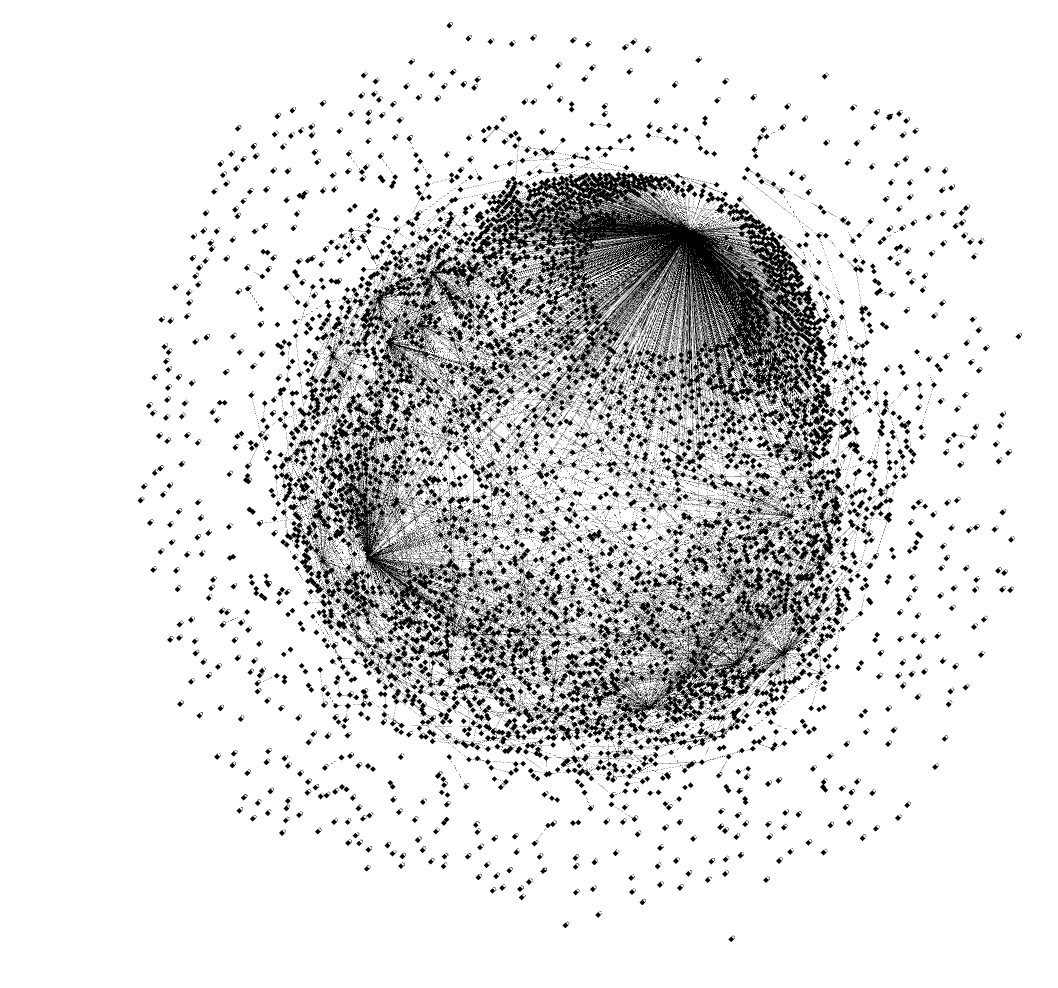

Below, the two dataframes are merged. Data could not be gathered for the variable associated with mentions, hence it has been ignored for the purposes of calculating a score. 

In [ ]:
df = tweets.merge(network, how = 'left', left_on = 'clean_screen_name', right_on = 'Label')

In [ ]:
df = df.loc[:,df.columns !='Unnamed: 0.1']
df.head()

,ids,create_time,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,clean_screen_name,rt,tweet_classification,Label,timeset,indegree,outdegree,Degree,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality
0,386329908,b'Sun Feb 07 07:41:28 +0000 2021',b'Rubygirl_Tweets',1978,2549,NaN,0,2813,4,b'Democratic Hellscape',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,Rubygirl_Tweets,rgoodlaw,RT,Rubygirl_Tweets,NaN,0,1,1,1.0,1.0,0.0
1,163299688,b'Sun Feb 07 07:41:16 +0000 2021',b'DennisCardiff',140010,2549,NaN,0,153976,1752,"b'Ottawa, Canada'",b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,DennisCardiff,rgoodlaw,RT,DennisCardiff,NaN,0,2,2,1.0,1.0,0.0
2,1372464902,b'Sun Feb 07 07:39:42 +0000 2021',b'ajisfabulous',2380,2549,NaN,0,204,20,b'',b'RT @rgoodlaw: NEW\n\nExclusive footage of Ro...,ajisfabulous,rgoodlaw,RT,ajisfabulous,NaN,0,1,1,1.0,1.0,0.0
3,23308670,b'Sun Feb 07 07:37:47 +0000 2021',b'PurrpleKrystal',627,0,b'MaddowBlog',0,1552,20,b'San Diego',b'@MaddowBlog I hope this is brought up in the...,PurrpleKrystal,MaddowBlog,Mention,PurrpleKrystal,NaN,1,2,3,1.0,1.0,0.0
4,23308670,b'Sun Feb 07 07:37:18 +0000 2021',b'PurrpleKrystal',627,0,NaN,0,1552,20,b'San Diego',b'I hope this is brought up in the #ConvictAnd...,PurrpleKrystal,PurrpleKrystal,Tweet (self-loop),PurrpleKrystal,NaN,1,2,3,1.0,1.0,0.0


The weights were chosen based on trials and in order of importance of the factors from Part 1. It has to be noted that the *listed* and *retweet* variables have been scaled separately. The network metrics were provided as scaled values from the software.

In [ ]:
w1 = 0.45
w2 = 0.25
w3 = 0.20
w4 = 0.10
df['score'] = (w1*df['retweet']/df['retweet'].sum()+w2*df['betweenesscentrality']+w3*df['listed']/df['listed'].sum()+w4*df['closnesscentrality'])
df_ordered = df.sort_values(by = 'score', ascending = False)

The list of the top 25 influencers is shown below:

In [ ]:
df_ordered[['Label','score']].drop_duplicates(subset = 'Label')[0:25]

,Label,score
3004,johncusack,0.106952
3118,JoyAnnReid,0.105769
1905,LindseyGrahamSC,0.104018
2546,Jerusalem_Post,0.104016
5930,SputnikInt,0.103146
5001,lilyellowgirl,0.102000
4902,Story_2tell,0.101992
4610,Thiswayplease16,0.101991
2529,BurtonBrown,0.101677
6004,jmlpyt,0.101646


As can be seen, some of the top influencers in the network are TV personalities and politicians. The influencer with the highest score according to our study is actor John Cusack. A quick look at Mr Cusack's twitter account shows that he is fairly active on twitter with approximately 1.7M followers. Furthermore, he has been actively tweeting and retweeting about President Trump and seems to occupy the more progressive side of the political spectrum. 

The fact that proved to be more interesting was that foreign media outlets were among the top 5 influencers in a network that dealt with the impeachment of an American president. The Jersusalem Post is a newspaper founded in 1932 and based in Jerusalem whereas Sputnik is a Russian state owned news agency founded in 2014.

Also, it was interesting to see individuals who, according to Google searches cannot be classified as famous, made it to the top 25 influencers list. Accounts such @amcInCal, @Redhead196749 and @jimm3783349 seem to belong to everyday citizens, but because of their activity on Twitter with regards to the impeachment trial, can be classified as influencers.